# Unsupervised Algorithms

In the first part of the notebook, we will experiment with the following:

1. Clustering with k-means in 2D
2. Clustering with k-means in high dimension (PCA for cluster visualization in 2D)
3. Outlier detection with SVM

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Clustering with k-means in 2D

In [2]:
## let's generate random data points using sklearn make_blob function
""" https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html """

blobs_kwargs = {
    "n_samples" : 500,
    "centers" : [(1,2), (3,4), (4,1), (5,6)],
    "cluster_std" : [0.4, 0.6, 0.3, 0.5],
    "n_features" : 2,
    "random_state" : 0
}

X, _ = make_blobs(**blobs_kwargs)
X.shape

(500, 2)

[]

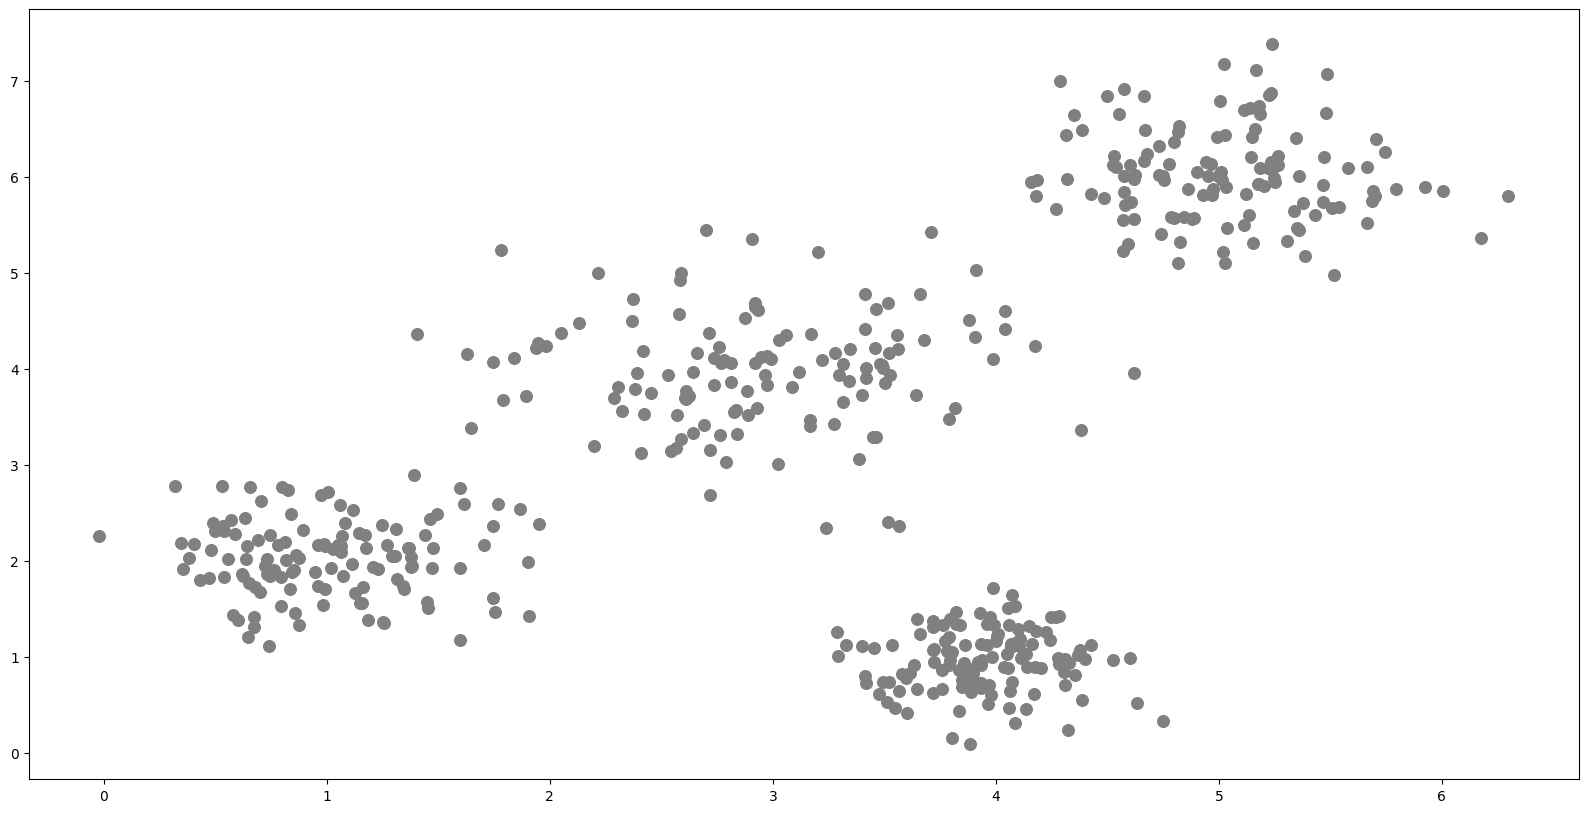

In [3]:
## visualize our data points using a scatter plot
x, y = X[:,0], X[:,1]

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x, y, color='gray', s=70)
plt.plot()

In [4]:
## Constructing clusterer
n_clusters = 4 # number of generated clusters is set by the user here
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

## Fitting clusterer
kmeans.fit(X)

## Retrieving cluster labels
clusters = kmeans.labels_
clusters


/home/pmalige/.my_envs/.teach/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 3, 3, 2, 3, 0, 1, 0, 1, 0, 2, 2, 0, 3, 3, 2, 1, 1, 2, 2, 2,
       1, 1, 3, 0, 2, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 2, 1, 1, 2, 1, 0, 2,
       0, 1, 2, 3, 3, 1, 1, 2, 2, 3, 2, 1, 3, 3, 3, 0, 1, 3, 2, 2, 1, 3,
       0, 0, 1, 1, 0, 3, 1, 3, 2, 3, 0, 1, 3, 3, 2, 2, 2, 1, 3, 0, 0, 3,
       3, 1, 0, 3, 2, 1, 3, 2, 3, 1, 3, 0, 1, 1, 3, 1, 3, 3, 0, 0, 2, 0,
       1, 1, 2, 1, 3, 1, 1, 2, 3, 3, 2, 0, 1, 0, 3, 1, 1, 0, 1, 3, 2, 2,
       3, 0, 1, 2, 1, 2, 0, 0, 0, 3, 2, 2, 3, 3, 0, 3, 2, 0, 0, 1, 1, 3,
       3, 2, 0, 2, 1, 1, 3, 3, 0, 2, 0, 1, 3, 0, 0, 1, 0, 0, 0, 2, 3, 2,
       1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 3, 3, 1, 3, 1, 1, 0, 2, 1, 1, 0,
       1, 0, 2, 1, 3, 1, 0, 1, 2, 2, 2, 0, 1, 3, 3, 1, 0, 3, 1, 1, 2, 3,
       1, 2, 2, 0, 3, 3, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 3, 1, 2, 1, 3, 1,
       2, 1, 0, 3, 1, 1, 3, 1, 2, 2, 0, 2, 3, 2, 1, 3, 1, 3, 0, 0, 0, 2,
       3, 3, 2, 3, 0, 3, 0, 1, 3, 2, 2, 2, 3, 1, 3, 1, 1, 2, 3, 3, 2, 1,
       3, 3, 1, 1, 0, 2, 2, 3, 2, 1, 0, 1, 0, 2, 2,

[]

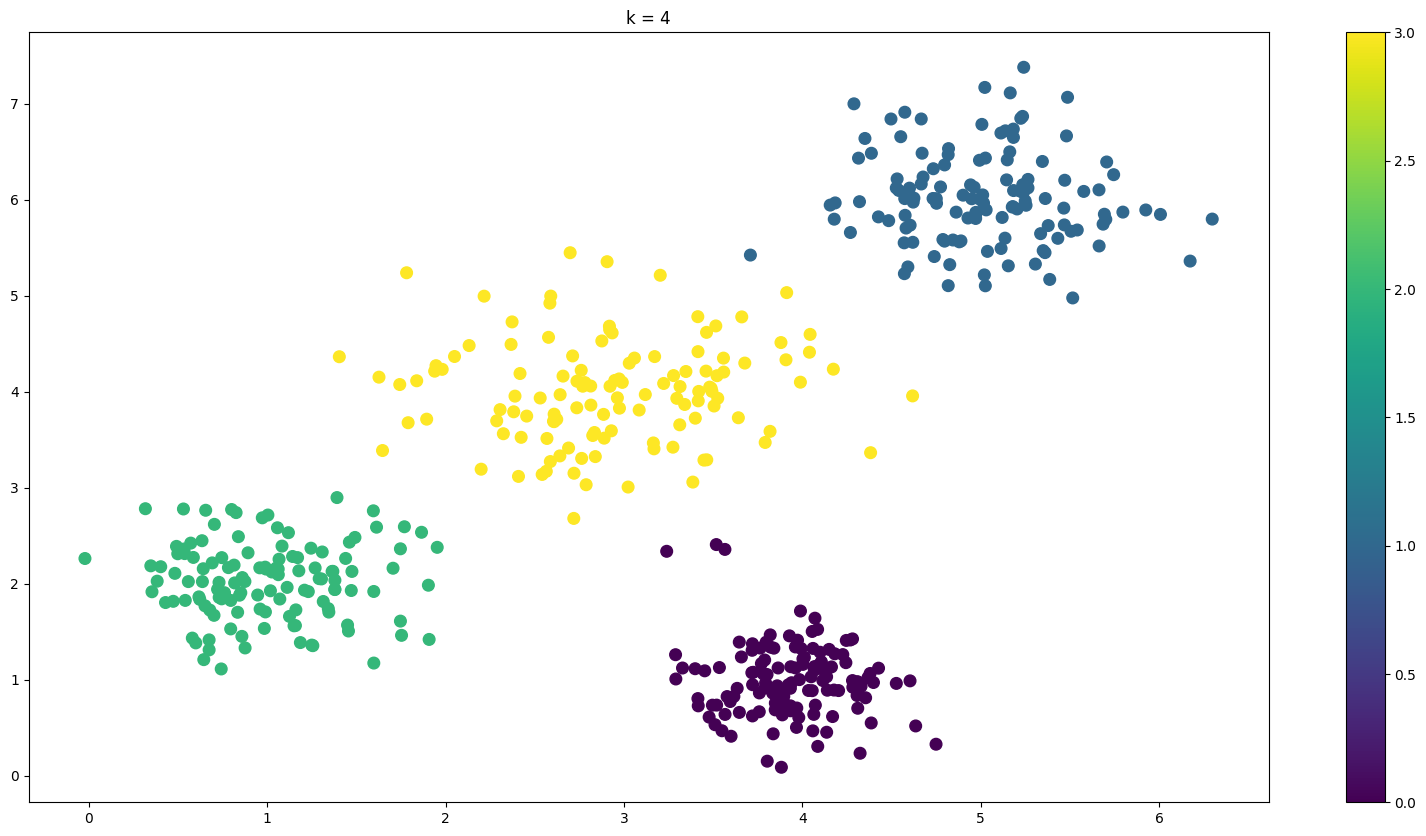

In [5]:
## visualize our data points using a scatter plot
fig, ax = plt.subplots(figsize=(20, 10))

plt.scatter(x, y, c=clusters, s=70) 
plt.colorbar()

plt.title('k = 4')

plt.plot()

## 2. Clustering with k-means in high dimension

In [6]:
## let's generate random data points in high dimendion d=100

blobs_kwargs = {
    "n_samples" : 500,
    "centers" : 4,
    "n_features" : 100,
    "random_state" : 0
}

X, _ = make_blobs(**blobs_kwargs)
X.shape

(500, 100)

### 2.1 Dimension reduction for visualization purposes

Let's use PCA to project our data points on a well-chosen 2D plane.

In [7]:
# scaling data points
scaled_X = StandardScaler().fit_transform(X)

# construct pca
n_components = 2 # dimension of the new vector space
pca = PCA(n_components)

# fit pca
pca.fit(scaled_X)

# use pca to transform embeddings
pca_X = pca.transform(scaled_X)
pca_X.shape

(500, 2)

[]

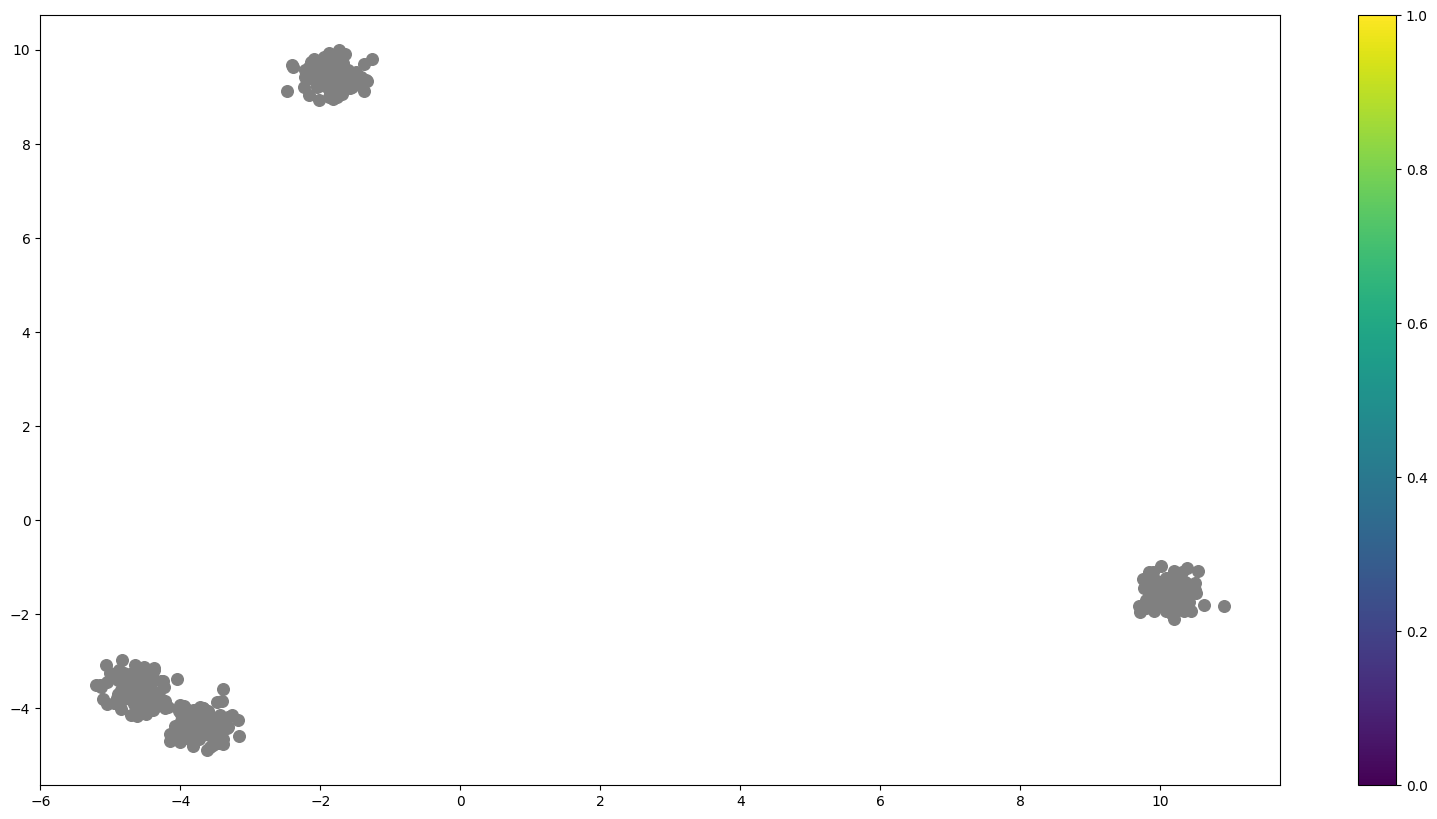

In [8]:
## visualize our data points using a scatter plot in 2D
x, y = pca_X[:,0], pca_X[:,1]

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x, y, color='gray', s=70) 
plt.colorbar()

plt.plot()

Even after the dimension reduction, we still retain some of the variance in our data point distribution. We plot the cumulative variance below, with only two components we were able to retain 65 percent of the original data point distribution variance.

In [ ]:
# plot cumulative variance
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))

### 2.2 Cluster data in the original high dimension space (d=100)

In [ ]:
## Constructing clusterer
n_clusters = 4 # number of generated clusters is set by the user here
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

## Fitting clusterer
kmeans.fit(X)

## Retrieving cluster labels
clusters = kmeans.labels_
clusters

In [ ]:
## visualize our data points using a scatter plot in 2D
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x, y, c=clusters, s=70) 
plt.colorbar()

parameters_str = f'value of k: {n_clusters}'
fig.text(.5, .05, parameters_str, ha='center')

plt.plot()

## 3. Support Vector Machines (SVM)

Nice summary of SMV by scikit learn:
https://scikit-learn.org/stable/modules/svm.html

SVM can be used for classification, regression and unsupervised outlier detection. As today's course focuses on unsupervised learning, we propose the following homework.

**To do:** Implement a one class SVM for outlier detection.
Usefull links:
1. OneClassSVM reference: https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM
2. Article about outlier detection: https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [ ]:
## let's generate random data points in 2D

blobs_kwargs = {
    "n_samples" : 500,
    "centers" : [(5,5), (5,5)],
    "cluster_std" : [0.2, 1],
    "n_features" : 2,
    "random_state" : 0
}

X, _ = make_blobs(**blobs_kwargs)
X.shape

In [ ]:
## visualize our data points using a scatter plot
x, y = X[:,0], X[:,1]

fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x, y, color='gray', s=70)
plt.plot()

In [ ]:
from sklearn.svm import OneClassSVM

## Construct a OneClassSVM with gamma parameter set to 'auto'
clf = OneClassSVM(gamma='auto')

## Fit SVM
clf.fit(X)

## Predict label (1 for the class, -1 for outliers)
labels = clf.predict(X)
labels

In [ ]:
## Visualize our data points using a scatter plot
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x, y, c=labels, s=70)
plt.plot()

# Change points detection in Time Series (DEMO)

In the second part we will use an existing package called *rupture* to perform an offline change point detection in time-series data.
Resource: https://medium.com/dataman-in-ai/finding-the-change-points-in-a-time-series-95a308207012

For this purpose, we will generate two-time series to test the algorithms. The change points in the first time series are easier to detect, and those of the second one is harder to detect. 
1. The first time series “ts1”: Has ten data segments with constant variance.
2. The second time series “ts2”: has ten data segments but with varying variances.

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
## let's generate random data points using numpy random function


# Example 1: contant variance
ts1 = []
mu, sigma, seg = 0.0, 1.0, 500
for i in range(10):
    ts = np.random.normal(mu, sigma, seg) + np.random.randint(low=-10, high=10)
    ts1 = np.append(ts1,ts, axis=0)

plt.figure(figsize=(16,4))
plt.plot(ts1)
plt.title("Varying mean, Constant variance");

# Example 2: varying variance
ts2 = []
mu, sigma, seg = 0.0, 1.0, 500
for i in range(10):
    sig = np.random.randint(low=1, high=50)
    ts = np.random.normal(mu, sigma * sig, seg) 
    ts2 = np.append(ts2,ts, axis=0)
    
plt.figure(figsize=(16,4))
plt.plot(ts2)
plt.title("Constant mean, Varying variance");

Example 1 - Varying variance

In [ ]:
import ruptures as rpt

# Detect the change points
algo1 = rpt.Pelt(model="rbf").fit(ts1)
change_location1 = algo1.predict(pen=10)

# Point the change points:
def plot_change_points(ts,ts_change_loc):
    plt.figure(figsize=(16,4))
    plt.plot(ts)
    for x in ts_change_loc:
        plt.axvline(x,lw=2, color='red')

plot_change_points(ts1,change_location1)

Example 2 - Varying variance

In [ ]:
# detect the change points #
algo2 = rpt.Pelt(model="rbf").fit(ts2)
change_location2 = algo2.predict(pen=10)
change_location2

# Plot the change points #
plot_change_points(ts2,change_location2)